In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.svm import SVC                        #SVM "Support vector classifier"
from sklearn import naive_bayes   #naive bayes classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from xgboost import plot_importance
from xgboost import XGBClassifier
import xgboost as xgb
import seaborn as sns; 
sns.axes_style("whitegrid")
sns.set_context("paper")
np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')

In [2]:
LT_salaries = games = pd.read_csv('Data/LT_salaries.csv')
LG_salaries = games = pd.read_csv('Data/LG_salaries.csv')
C_salaries = games = pd.read_csv('Data/C_salaries.csv')
RG_salaries = games = pd.read_csv('Data/RG_salaries.csv')
RT_salaries = games = pd.read_csv('Data/RT_salaries.csv')

In [3]:
LT_salaries.head()

,Player,Team,Cap Number,Cash Spent
0,D.J. Humphries,Cardinals,"$19,930,000","$15,600,000"
1,Cam Robinson,Jaguars,"$13,754,000","$13,754,000"
2,Kolton Miller,Raiders,"$13,469,329","$11,500,000"
3,Taylor Lewan,Titans,"$13,393,971","$11,600,000"
4,Jake Matthews,Falcons,"$12,264,200","$13,000,000"


## Plot Undervalued Tackles

In [4]:
T_salaries = pd.concat([LT_salaries,RT_salaries], axis = 0)
T_salaries.head()

,Player,Team,Cap Number,Cash Spent
0,D.J. Humphries,Cardinals,"$19,930,000","$15,600,000"
1,Cam Robinson,Jaguars,"$13,754,000","$13,754,000"
2,Kolton Miller,Raiders,"$13,469,329","$11,500,000"
3,Taylor Lewan,Titans,"$13,393,971","$11,600,000"
4,Jake Matthews,Falcons,"$12,264,200","$13,000,000"


In [5]:
#Make Cap hit a number
T_salaries['Cap'] = T_salaries['Cap Number'].str.replace("$","").str.replace(",","")
T_salaries['Cap'] = pd.to_numeric(T_salaries['Cap'])

In [6]:
best_OL = pd.read_csv('best_OL.csv')
best_OL.head()

,displayName,playId,pred_OLwin,olineman_win,pff_positionLinedUp_LT,pff_positionLinedUp_LG,pff_positionLinedUp_RG,pff_positionLinedUp_RT,WinOverExpected
0,Bobby Massie,24788225.0,5873.0,10422.0,0.0,0.0,0.0,11882.0,4549.0
1,Tristan Wirfs,25568677.0,6805.0,10990.0,0.0,0.0,0.0,11503.0,4185.0
2,Taylor Moton,26066236.0,6327.0,10391.0,1532.0,0.0,0.0,10328.0,4064.0
3,Mike Remmers,10898211.0,0.0,3691.0,0.0,0.0,0.0,4285.0,3691.0
4,Rob Havenstein,18150912.0,5258.0,8910.0,0.0,0.0,0.0,9838.0,3652.0


In [7]:
best_LT = best_OL[best_OL.pff_positionLinedUp_LT != 0]
best_RT = best_OL[best_OL.pff_positionLinedUp_RT != 0]
best_T = pd.concat([best_LT,best_RT], axis = 0)
best_T.head(10)

,displayName,playId,pred_OLwin,olineman_win,pff_positionLinedUp_LT,pff_positionLinedUp_LG,pff_positionLinedUp_RG,pff_positionLinedUp_RT,WinOverExpected
2,Taylor Moton,26066236.0,6327.0,10391.0,1532.0,0.0,0.0,10328.0,4064.0
14,Nate Solder,24138540.0,5883.0,8846.0,1430.0,0.0,0.0,9127.0,2963.0
24,Jordan Mailata,16218087.0,4711.0,6591.0,4317.0,0.0,0.0,3136.0,1880.0
30,Blake Hance,11592798.0,2434.0,4029.0,3081.0,0.0,0.0,2023.0,1595.0
31,Spencer Brown,8532571.0,1963.0,3480.0,40.0,0.0,0.0,4239.0,1517.0
33,Charles Leno,27965158.0,9520.0,10928.0,12295.0,0.0,0.0,0.0,1408.0
34,Larry Borom,3523912.0,226.0,1601.0,324.0,0.0,0.0,1476.0,1375.0
35,Jason Spriggs,3144160.0,34.0,1354.0,34.0,0.0,0.0,1539.0,1320.0
37,Dion Dawkins,20598885.0,8376.0,9672.0,10407.0,0.0,0.0,0.0,1296.0
41,James Hudson,6305591.0,722.0,1852.0,352.0,0.0,0.0,1973.0,1130.0


In [8]:
# join salaries with stats
T_salaries = T_salaries.merge(best_T, how = 'inner', left_on = 'Player', right_on = 'displayName')
T_salaries.head()

,Player,Team,Cap Number,Cash Spent,Cap,displayName,playId,pred_OLwin,olineman_win,pff_positionLinedUp_LT,pff_positionLinedUp_LG,pff_positionLinedUp_RG,pff_positionLinedUp_RT,WinOverExpected
0,D.J. Humphries,Cardinals,"$19,930,000","$15,600,000",19930000,D.J. Humphries,19197253.0,8890.0,8611.0,9929.0,0.0,0.0,0.0,-279.0
1,Cam Robinson,Jaguars,"$13,754,000","$13,754,000",13754000,Cam Robinson,25295701.0,8939.0,8881.0,10461.0,0.0,0.0,0.0,-58.0
2,Kolton Miller,Raiders,"$13,469,329","$11,500,000",13469329,Kolton Miller,22166523.0,8161.0,9217.0,10137.0,0.0,0.0,0.0,1056.0
3,Taylor Lewan,Titans,"$13,393,971","$11,600,000",13393971,Taylor Lewan,14995181.0,6028.0,6198.0,6877.0,0.0,0.0,0.0,170.0
4,Jake Matthews,Falcons,"$12,264,200","$13,000,000",12264200,Jake Matthews,22106909.0,8795.0,9723.0,10543.0,0.0,0.0,0.0,928.0


In [30]:
#Isolate T with below average salaries
mean = T_salaries['Cap'].mean()
undervalued_T = T_salaries[T_salaries.Cap < mean]
undervalued_T = undervalued_T.sort_values(by = 'WinOverExpected', ascending = False)

In [41]:
#best T
T_salaries[['Player', 'Team', 'Cap Number', 'WinOverExpected']].drop_duplicates().sort_values(by = 'WinOverExpected',ascending = False).head(10).reset_index(drop = True)

,Player,Team,Cap Number,WinOverExpected
0,Bobby Massie,Broncos,"$2,275,000",4549.0
1,Tristan Wirfs,Buccaneers,"$3,688,188",4185.0
2,Taylor Moton,Panthers,"$4,000,000",4064.0
3,Mike Remmers,Chiefs,"$3,300,000",3691.0
4,Rob Havenstein,Rams,"$5,258,000",3652.0
5,Charlie Heck,Texans,"$938,787",3502.0
6,Jawaan Taylor,Jaguars,"$2,139,115",3392.0
7,Brian O'Neill,Vikings,"$5,636,430",3386.0
8,Jesse Davis,Dolphins,"$4,585,000",3359.0
9,Riley Reiff,Bengals,"$4,714,706",3315.0


In [31]:
undervalued_T[['Player', 'Team', 'Cap Number', 'WinOverExpected']].head(10).reset_index(drop = True)

,Player,Team,Cap Number,WinOverExpected
0,Bobby Massie,Broncos,"$2,275,000",4549.0
1,Tristan Wirfs,Buccaneers,"$3,688,188",4185.0
2,Mike Remmers,Chiefs,"$3,300,000",3691.0
3,Charlie Heck,Texans,"$938,787",3502.0
4,Jawaan Taylor,Jaguars,"$2,139,115",3392.0
5,Terence Steele,Cowboys,"$783,333",3286.0
6,Matt Nelson,Lions,"$780,000",3271.0
7,Kelvin Beachum,Cardinals,"$1,575,000",3074.0
8,Cornelius Lucas,Commanders,"$2,050,000",2956.0
9,David Quessenberry,Titans,"$850,000",2707.0


Text(0.5, 1.0, 'Visualizing Undervalued Tackles')

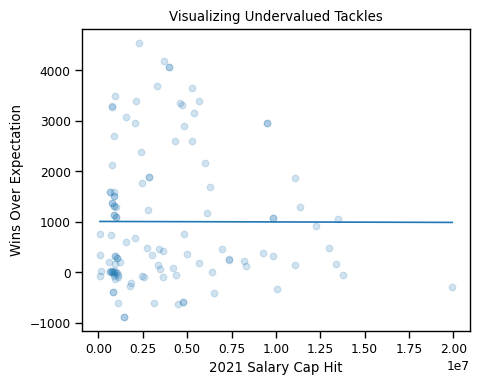

In [11]:
x =  T_salaries['Cap']
y = T_salaries['WinOverExpected']
fig, ax = plt.subplots(figsize=(5, 4),dpi= 100)
plt.scatter(x,y,label = 'All Tackles',alpha=.2)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('2021 Salary Cap Hit')
plt.ylabel('Wins Over Expectation')
plt.title("Visualizing Undervalued Tackles")


Text(0.5, 1.0, 'Visualizing Undervalued Tackles')

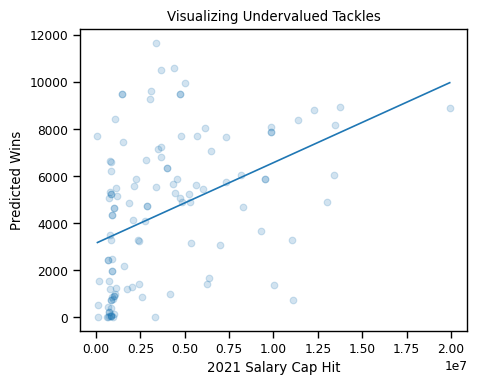

In [12]:
x =  T_salaries['Cap']
y = T_salaries['pred_OLwin']
fig, ax = plt.subplots(figsize=(5, 4),dpi= 100)
plt.scatter(x,y,label = 'All Tackles',alpha=.2)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('2021 Salary Cap Hit')
plt.ylabel('Predicted Wins')
plt.title("Visualizing Undervalued Tackles")

# Plot Undervalued Guards

In [13]:
G_salaries = pd.concat([LG_salaries,RG_salaries], axis = 0)
G_salaries.head()

,Player,Team,Cap Number,Cash Spent
0,Andrew Norwell,Jaguars,"$15,000,000","$9,000,000"
1,Rodger Saffold,Titans,"$12,345,588","$9,970,588"
2,Joel Bitonio,Browns,"$8,158,824","$16,558,824"
3,Ali Marpet,Buccaneers,"$8,025,000","$10,250,000"
4,Quenton Nelson,Colts,"$7,771,018","$3,907,580"


In [14]:
#Make Cap hit a number
G_salaries['Cap'] = G_salaries['Cap Number'].str.replace("$","").str.replace(",","")
G_salaries['Cap'] = pd.to_numeric(G_salaries['Cap'])

In [15]:
best_LG = best_OL[best_OL.pff_positionLinedUp_LG != 0]
best_RG = best_OL[best_OL.pff_positionLinedUp_RG != 0]
best_G = pd.concat([best_LG,best_RG], axis = 0)
best_G.head(10)

,displayName,playId,pred_OLwin,olineman_win,pff_positionLinedUp_LT,pff_positionLinedUp_LG,pff_positionLinedUp_RG,pff_positionLinedUp_RT,WinOverExpected
8,Jesse Davis,23524080.0,5876.0,9235.0,0.0,3412.0,0.0,8006.0,3359.0
18,Michael Onwenu,17275326.0,5007.0,7704.0,0.0,5285.0,0.0,3257.0,2697.0
38,Tyre Phillips,6010142.0,1007.0,2258.0,0.0,1105.0,0.0,1472.0,1251.0
50,Joel Bitonio,19134124.0,8955.0,9718.0,0.0,10161.0,0.0,0.0,763.0
55,James Hurst,9873118.0,4139.0,4820.0,3459.0,1494.0,122.0,0.0,681.0
60,Quinton Spain,18813082.0,8600.0,9198.0,0.0,9805.0,0.0,0.0,598.0
63,Andrew Norwell,25216497.0,9328.0,9906.0,0.0,10381.0,0.0,0.0,578.0
65,Connor Williams,20110608.0,8505.0,9063.0,0.0,9479.0,0.0,0.0,558.0
68,Joe Thuney,30789575.0,12426.0,12968.0,0.0,13640.0,0.0,0.0,542.0
81,Ereck Flowers,27571415.0,11018.0,11422.0,0.0,12188.0,0.0,0.0,404.0


In [16]:
# join salaries and stats
G_salaries = G_salaries.merge(best_G, how = 'inner', left_on = 'Player', right_on = 'displayName')
G_salaries.head()

,Player,Team,Cap Number,Cash Spent,Cap,displayName,playId,pred_OLwin,olineman_win,pff_positionLinedUp_LT,pff_positionLinedUp_LG,pff_positionLinedUp_RG,pff_positionLinedUp_RT,WinOverExpected
0,Andrew Norwell,Jaguars,"$15,000,000","$9,000,000",15000000,Andrew Norwell,25216497.0,9328.0,9906.0,0.0,10381.0,0.0,0.0,578.0
1,Rodger Saffold,Titans,"$12,345,588","$9,970,588",12345588,Rodger Saffold,14273384.0,6834.0,7125.0,0.0,7757.0,0.0,0.0,291.0
2,Joel Bitonio,Browns,"$8,158,824","$16,558,824",8158824,Joel Bitonio,19134124.0,8955.0,9718.0,0.0,10161.0,0.0,0.0,763.0
3,Ali Marpet,Buccaneers,"$8,025,000","$10,250,000",8025000,Ali Marpet,25245360.0,10431.0,10621.0,0.0,11426.0,0.0,0.0,190.0
4,Quenton Nelson,Colts,"$7,771,018","$3,907,580",7771018,Quenton Nelson,12690391.0,5564.0,5708.0,0.0,6150.0,0.0,0.0,144.0


In [38]:
#best G
G_salaries[['Player', 'Team', 'Cap Number', 'WinOverExpected']].sort_values(by = 'WinOverExpected',ascending = False).head(10).reset_index(drop = True)

,Player,Team,Cap Number,WinOverExpected
0,Michael Onwenu,Patriots,"$830,617",2697.0
1,Tyre Phillips,Ravens,"$988,073",1251.0
2,Chris Lindstrom,Falcons,"$4,011,479",923.0
3,Joel Bitonio,Browns,"$8,158,824",763.0
4,Will Hernandez,Giants,"$3,057,680",713.0
5,Robert Hunt,Dolphins,"$1,833,123",695.0
6,Kevin Zeitler,Ravens,"$4,050,000",672.0
7,James Daniels,Bears,"$2,966,665",634.0
8,Quinton Spain,Bengals,"$987,500",598.0
9,Daniel Brunskill,49ers,"$850,000",595.0


In [32]:
#Isolate G with below average salaries
mean = G_salaries['Cap'].mean()
undervalued_G = G_salaries[G_salaries.Cap < mean]
undervalued_G = undervalued_G.sort_values(by = 'WinOverExpected', ascending = False)

In [33]:
undervalued_G[['Player', 'Team', 'Cap Number', 'WinOverExpected']].head(10).reset_index(drop = True)

,Player,Team,Cap Number,WinOverExpected
0,Michael Onwenu,Patriots,"$830,617",2697.0
1,Tyre Phillips,Ravens,"$988,073",1251.0
2,Robert Hunt,Dolphins,"$1,833,123",695.0
3,Quinton Spain,Bengals,"$987,500",598.0
4,Daniel Brunskill,49ers,"$850,000",595.0
5,Alex Cappa,Buccaneers,"$2,381,426",556.0
6,Wyatt Teller,Browns,"$2,677,800",507.0
7,Jermaine Eluemunor,Raiders,"$850,000",494.0
8,Connor McGovern,Cowboys,"$1,000,527",386.0
9,Ben Powers,Ravens,"$1,024,383",362.0


Text(0.5, 1.0, 'Visualizing Undervalued Guards')

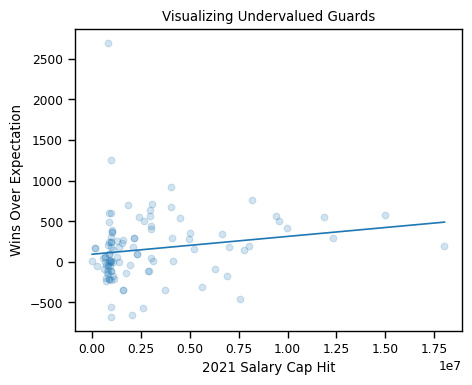

In [19]:
x =  G_salaries['Cap']
y = G_salaries['WinOverExpected']
fig, ax = plt.subplots(figsize=(5, 4),dpi= 100)
plt.scatter(x,y,label = 'All Guards',alpha=.2)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('2021 Salary Cap Hit')
plt.ylabel('Wins Over Expectation')
plt.title("Visualizing Undervalued Guards")

Text(0.5, 1.0, 'Visualizing Undervalued Guards')

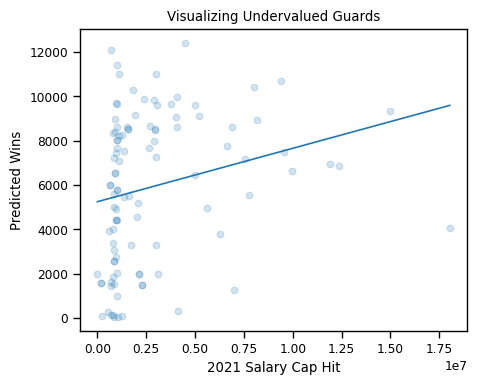

In [20]:
x =  G_salaries['Cap']
y = G_salaries['pred_OLwin']
fig, ax = plt.subplots(figsize=(5, 4),dpi= 100)
plt.scatter(x,y,label = 'All Guards',alpha=.2)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('2021 Salary Cap Hit')
plt.ylabel('Predicted Wins')
plt.title("Visualizing Undervalued Guards")

# Plot Undervalued Centers

In [21]:
C_salaries.head()

,Player,Team,Cap Number,Cash Spent
0,J.C. Tretter,Browns,"$11,060,294","$9,450,000"
1,Ryan Jensen,Buccaneers,"$10,000,000","$10,000,000"
2,Connor McGovern,Jets,"$9,333,333","$8,000,000"
3,Brandon Linder,Jaguars,"$8,529,412","$8,529,412"
4,Mitch Morse,Bills,"$8,327,941","$6,625,000"


In [22]:
#Make Cap hit a number
C_salaries['Cap'] = C_salaries['Cap Number'].str.replace("$","").str.replace(",","")
C_salaries['Cap'] = pd.to_numeric(C_salaries['Cap'])

In [23]:
best_C = best_OL[best_OL.pff_positionLinedUp_LT == 0]
best_C = best_C[best_C.pff_positionLinedUp_LG == 0]
best_C = best_C[best_C.pff_positionLinedUp_RG == 0]
best_C = best_C[best_C.pff_positionLinedUp_RT == 0]
best_C.head(10)

,displayName,playId,pred_OLwin,olineman_win,pff_positionLinedUp_LT,pff_positionLinedUp_LG,pff_positionLinedUp_RG,pff_positionLinedUp_RT,WinOverExpected
48,Creed Humphrey,30789575.0,12295.0,13105.0,0.0,0.0,0.0,0.0,810.0
52,Corey Linsley,22274883.0,9649.0,10393.0,0.0,0.0,0.0,0.0,744.0
58,Alex Mack,18166847.0,7588.0,8209.0,0.0,0.0,0.0,0.0,621.0
62,Chase Roullier,25252856.0,9925.0,10507.0,0.0,0.0,0.0,0.0,582.0
74,Rodney Hudson,11510192.0,5576.0,6049.0,0.0,0.0,0.0,0.0,473.0
80,Sam Mustipher,20479705.0,8750.0,9161.0,0.0,0.0,0.0,0.0,411.0
89,Frank Ragnow,11885893.0,4631.0,4982.0,0.0,0.0,0.0,0.0,351.0
92,Andre James,22310681.0,9017.0,9363.0,0.0,0.0,0.0,0.0,346.0
93,Lloyd Cushenberry,24788225.0,10631.0,10973.0,0.0,0.0,0.0,0.0,342.0
96,Erik McCoy,6777111.0,2889.0,3215.0,0.0,0.0,0.0,0.0,326.0


In [24]:
# join salaries and stats
C_salaries = C_salaries.merge(best_C, how = 'inner', left_on = 'Player', right_on = 'displayName')
C_salaries.head()

,Player,Team,Cap Number,Cash Spent,Cap,displayName,playId,pred_OLwin,olineman_win,pff_positionLinedUp_LT,pff_positionLinedUp_LG,pff_positionLinedUp_RG,pff_positionLinedUp_RT,WinOverExpected
0,J.C. Tretter,Browns,"$11,060,294","$9,450,000",11060294,J.C. Tretter,19134124.0,9500.0,9715.0,0.0,0.0,0.0,0.0,215.0
1,Ryan Jensen,Buccaneers,"$10,000,000","$10,000,000",10000000,Ryan Jensen,25520090.0,10525.0,10605.0,0.0,0.0,0.0,0.0,80.0
2,Brandon Linder,Jaguars,"$8,529,412","$8,529,412",8529412,Brandon Linder,14261438.0,5920.0,5972.0,0.0,0.0,0.0,0.0,52.0
3,Mitch Morse,Bills,"$8,327,941","$6,625,000",8327941,Mitch Morse,20524567.0,9783.0,9772.0,0.0,0.0,0.0,0.0,-11.0
4,Ryan Kelly,Colts,"$7,900,000","$14,650,000",7900000,Ryan Kelly,20633798.0,9212.0,9348.0,0.0,0.0,0.0,0.0,136.0


In [34]:
#Isolate G with below average salaries
mean = C_salaries['Cap'].mean()
undervalued_C = C_salaries[C_salaries.Cap < mean]
undervalued_C = undervalued_C.sort_values(by = 'WinOverExpected', ascending = False)

In [39]:
#best C
C_salaries[['Player', 'Team', 'Cap Number', 'WinOverExpected']].sort_values(by = 'WinOverExpected',ascending = False).head(10).reset_index(drop = True)

,Player,Team,Cap Number,WinOverExpected
0,Creed Humphrey,Chiefs,"$1,011,856",810.0
1,Corey Linsley,Chargers,"$6,600,000",744.0
2,Alex Mack,49ers,"$3,050,000",621.0
3,Chase Roullier,Commanders,"$4,540,000",582.0
4,Rodney Hudson,Cardinals,"$2,860,000",473.0
5,Sam Mustipher,Bears,"$780,000",411.0
6,Frank Ragnow,Lions,"$4,070,954",351.0
7,Andre James,Raiders,"$2,503,334",346.0
8,Lloyd Cushenberry,Broncos,"$1,058,180",342.0
9,Erik McCoy,Saints,"$1,661,068",326.0


In [35]:
undervalued_C[['Player', 'Team', 'Cap Number', 'WinOverExpected']].head(10).reset_index(drop = True)

,Player,Team,Cap Number,WinOverExpected
0,Creed Humphrey,Chiefs,"$1,011,856",810.0
1,Alex Mack,49ers,"$3,050,000",621.0
2,Rodney Hudson,Cardinals,"$2,860,000",473.0
3,Sam Mustipher,Bears,"$780,000",411.0
4,Andre James,Raiders,"$2,503,334",346.0
5,Lloyd Cushenberry,Broncos,"$1,058,180",342.0
6,Erik McCoy,Saints,"$1,661,068",326.0
7,Billy Price,Giants,"$2,077,158",176.0
8,Evan Brown,Lions,"$920,000",173.0
9,Brian Allen,Rams,"$1,091,734",153.0


Text(0.5, 1.0, 'Visualizing Undervalued Centers')

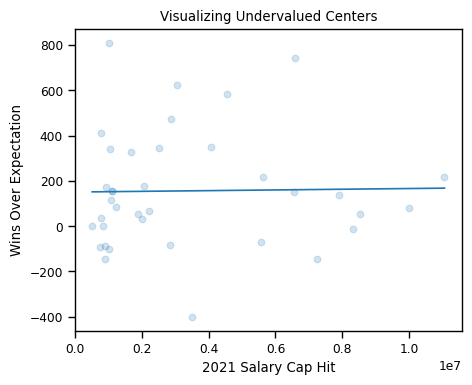

In [27]:
x =  C_salaries['Cap']
y = C_salaries['WinOverExpected']
fig, ax = plt.subplots(figsize=(5, 4),dpi= 100)
plt.scatter(x,y,label = 'All Centers',alpha=.2)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('2021 Salary Cap Hit')
plt.ylabel('Wins Over Expectation')
plt.title("Visualizing Undervalued Centers")

Text(0.5, 1.0, 'Visualizing Undervalued Centers')

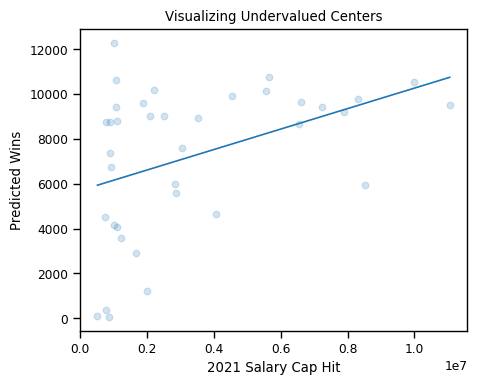

In [28]:
x =  C_salaries['Cap']
y = C_salaries['pred_OLwin']
fig, ax = plt.subplots(figsize=(5, 4),dpi= 100)
plt.scatter(x,y,label = 'All Centers',alpha=.2)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('2021 Salary Cap Hit')
plt.ylabel('Predicted Wins')
plt.title("Visualizing Undervalued Centers")